In [1]:
import pickle
with open('mean_distances.pkl', 'rb') as f:
    mean_distances = pickle.load(f)
    print(mean_distances)

/root/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'0_mean_dist': tensor([[120.8282, 117.1015,  72.9130,  ...,   6.8616,  27.5512, 114.1854],
        [120.7227, 117.0249,  72.9361,  ...,   6.8155,  27.5504, 114.1320],
        [120.7611, 117.0447,  72.9416,  ...,   6.7938,  27.5309, 114.1376],
        ...,
        [120.8195, 117.0891,  72.9302,  ...,   6.8413,  27.5505, 114.1742],
        [120.8070, 117.0885,  72.9286,  ...,   6.8543,  27.5498, 114.1719],
        [120.7438, 117.0451,  72.9308,  ...,   6.8163,  27.5400, 114.1392]],
       dtype=torch.float64), '1_mean_dist': tensor([[ 73.1165, 100.1640, 109.2055,  ..., 112.1329, 112.4467,  48.3079],
        [ 73.1349,  99.9281, 109.1616,  ..., 112.0438, 112.4131,  48.2865],
        [ 73.1764,  99.9616, 109.1709,  ..., 112.0643, 112.4359,  48.3805],
        ...,
        [ 73.1521, 100.1877, 109.2340,  ..., 112.1532, 112.4612,  48.3194],
        [ 73.1394, 100.1449, 109.1964,  ..., 112.1329, 112.4500,  48.3173],
        [ 73.1258,  99.9513, 109.1414,  ..., 112.0191, 112.3810,  48.2978]],


In [2]:
# For a single transforer block, we have attention distances
# for 1000 images for each attention head. We have 12 such
# attention head per transformer block.
mean_distances["0_mean_dist"].shape

torch.Size([1000, 12])

In [3]:
# Get the number of heads from the mean distance output
num_heads = mean_distances["0_mean_dist"].shape[-1]

# Print the shapes
print(f"Num Heads: {num_heads}")

Num Heads: 12


In [4]:
import torch
for key, value in mean_distances.items():
    mean_distances[key] = torch.mean(value, dim=0, keepdim=True)

In [5]:
# For a single transformer block we have calculate mean attention distances
# for 12 attention heads.
mean_distances["0_mean_dist"].shape
print(mean_distances)

{'0_mean_dist': tensor([[120.8054, 117.0841,  72.9252, 109.2181,  28.4726,   1.3884, 118.5915,
           1.2104,  84.9537,   6.8390,  27.5541, 114.1747]],
       dtype=torch.float64), '1_mean_dist': tensor([[ 73.1332, 100.1322, 109.2056, 111.5915, 113.4755, 103.8237,  80.0781,
          81.1204,  98.0992, 112.1256, 112.4583,  48.2870]],
       dtype=torch.float64), '2_mean_dist': tensor([[112.7203, 101.4890,  91.0404,  31.1461, 103.0243,  54.7096,  96.9250,
          20.7957,  79.6224,  82.8276,  99.9438,  98.7940]],
       dtype=torch.float64), '3_mean_dist': tensor([[ 24.2649, 102.5940,  54.8661,  15.9794,  70.2198,  90.4607,  64.9946,
          69.1355,  15.3302,  43.7865,  41.3887,  90.1737]],
       dtype=torch.float64), '4_mean_dist': tensor([[ 54.5787, 113.6360,  19.5324,  61.2139,  73.5742,  63.2363,  48.3443,
          64.8531,  85.7057,  73.4120,  30.9825,  18.8275]],
       dtype=torch.float64), '5_mean_dist': tensor([[ 36.5866,  89.0439,  38.6158,  46.2401,  50.8684, 103.7

## Visualize the mean distances

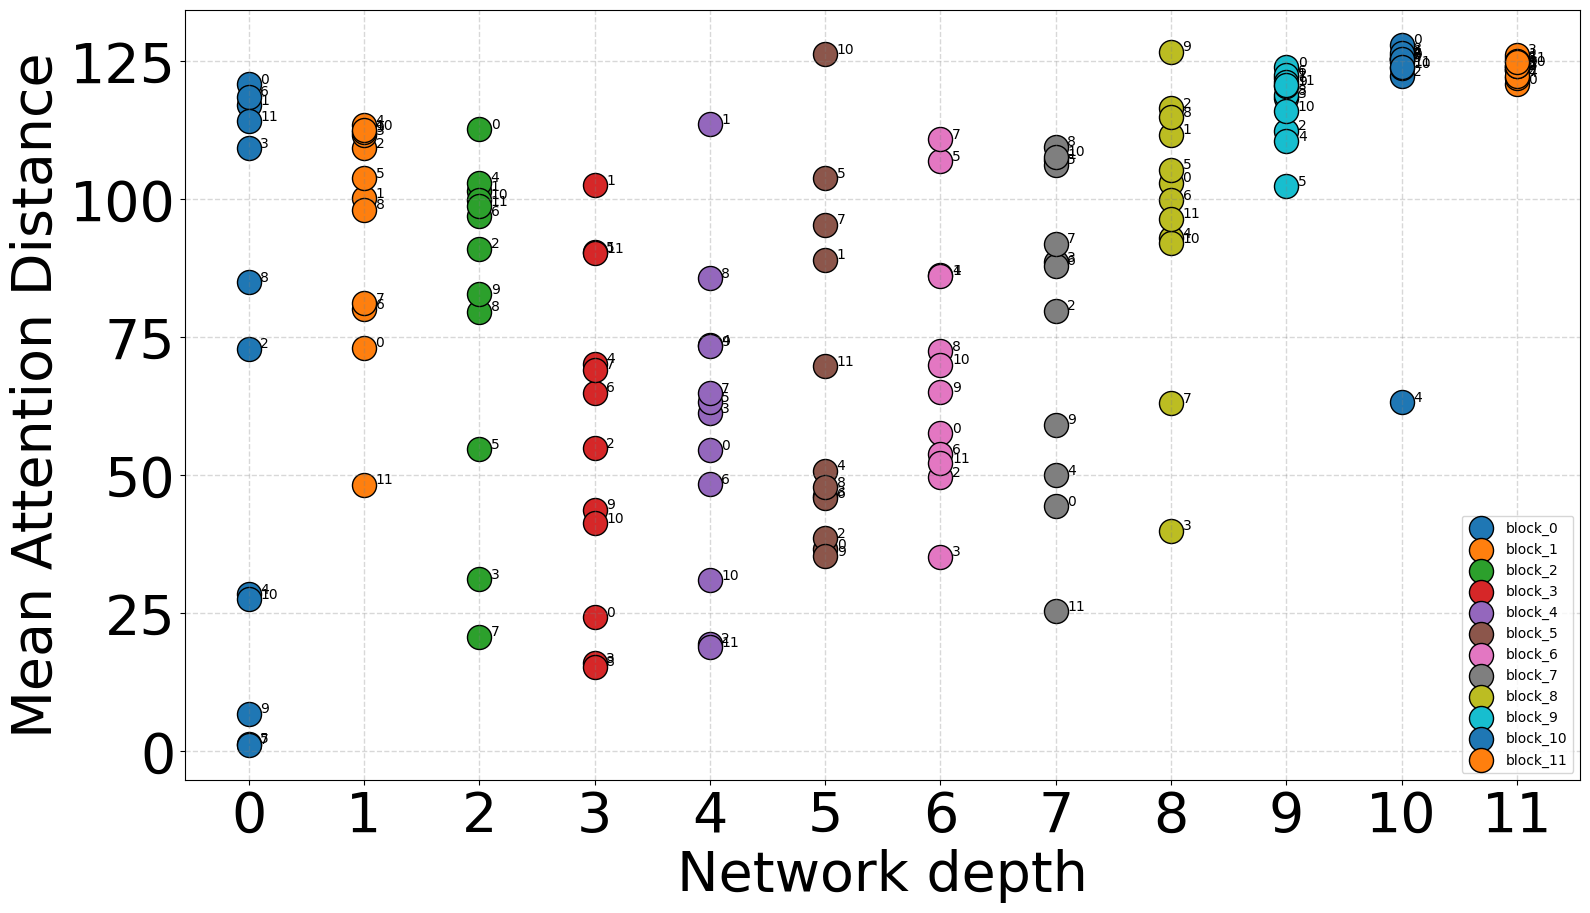

In [17]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 1, figsize=(18, 10), sharey=True)
#plt.figure(figsize=(10, 10))

# 设置网格线的颜色
axs.grid(color='gray', linestyle='--', linewidth=1, alpha=0.3)
# 设置x轴的刻度，每个单位显示一个网格线
axs.set_xticks(range(0, len(mean_distances), 1))

first = list()
last = list()

for idx in range(len(mean_distances)):
    mean_distance = mean_distances[f"{idx}_mean_dist"]

    x = [idx] * num_heads
    y = mean_distance[0, :]

    plt.scatter(x=x, y=y, marker='o', s=300, edgecolor='black', linewidths=1, label=f"block_{idx}")
    for i, txt in enumerate(range(num_heads)):
        plt.annotate(txt, (x[i] + 0.1, y[i] + 0.1))

plt.xlabel("Network depth", fontsize=40)
plt.ylabel("Mean Attention Distance", fontsize=40)
plt.tick_params(labelsize=40)
plt.legend(loc="lower right")
#plt.title('DeiT')
plt.show()
fig.savefig('fig/DeiT_Mean_Attn.pdf',bbox_inches='tight')
plt.close()

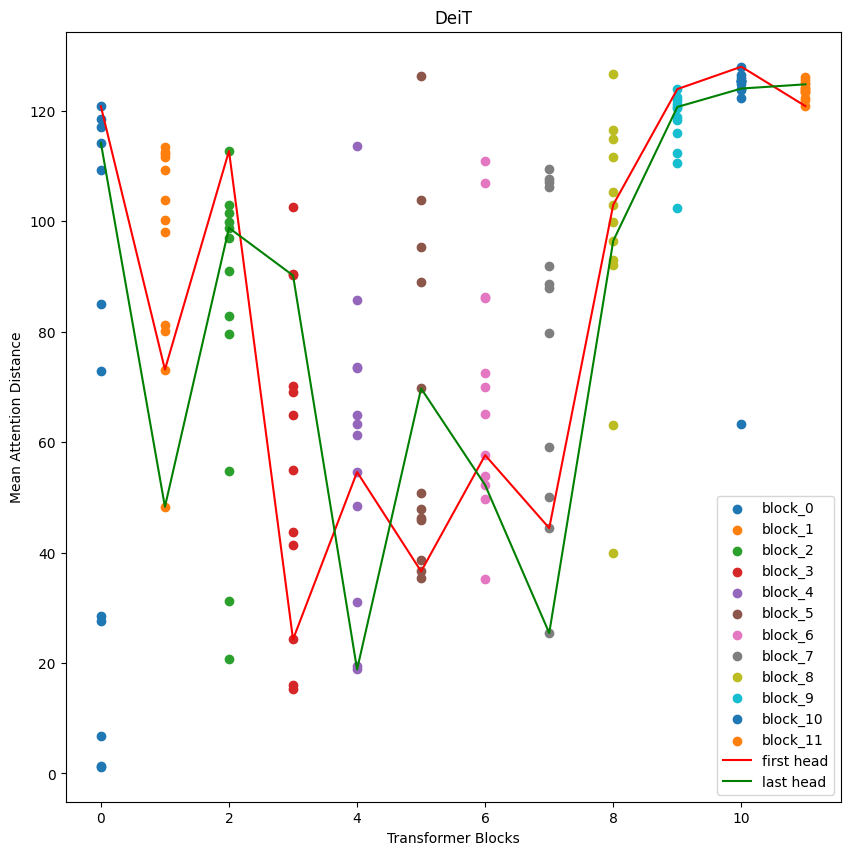

In [7]:
plt.figure(figsize=(10, 10))

first = list() 
last = list()

for idx in range(len(mean_distances)):
    mean_distance = mean_distances[f"{idx}_mean_dist"]

    x = [idx] * num_heads
    y = mean_distance[0, :]

    plt.scatter(x=x, y=y, label=f"block_{idx}")

    first.append(y[0])
    last.append(y[-1])

plt.plot(first, "r-", label="first head")
plt.plot(last, "g-", label="last head")

plt.xlabel("Transformer Blocks")
plt.ylabel("Mean Attention Distance")
plt.legend(loc="lower right")
plt.title('DeiT')
plt.show()

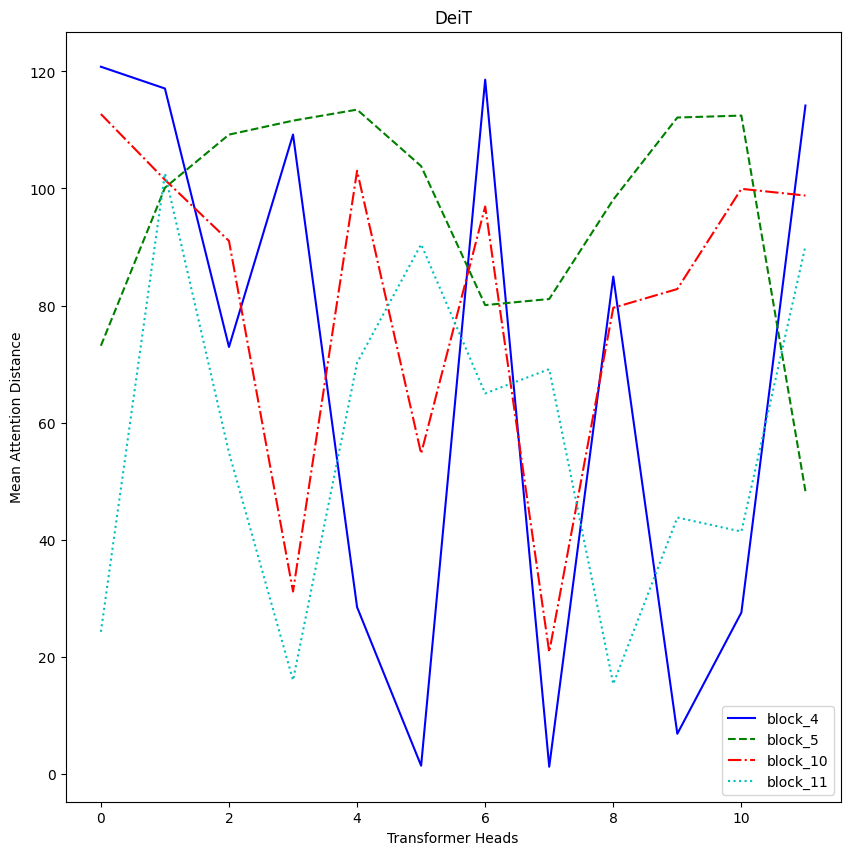

In [8]:
plt.figure(figsize=(10, 10))

first = list()
last = list()

blocks = [4, 5, 10, 11]
chars = ["-", "--", "-.", ":"]
colors = ["b", "g", "r", "c"]

for idx, block_num in enumerate(blocks):
    mean_distance = mean_distances[f"{idx}_mean_dist"]

    x = list(range(num_heads))
    y = mean_distance[0, :]

    plt.plot(x, y, f"{colors[idx]}{chars[idx]}", label=f"block_{block_num}")

plt.xlabel("Transformer Heads")
plt.ylabel("Mean Attention Distance")
plt.legend(loc="lower right")
plt.title('DeiT')
plt.show()

## DBSCAN
Reference:https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [12]:
from sklearn.cluster import DBSCAN
import numpy as np

# 创建一个随机数据样本
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

# 创建DBSCAN模型实例
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

# 打印每个数据点的聚类标签
print(clustering.labels_)

[ 0  0  0  1  1 -1]


In [18]:
from sklearn.cluster import DBSCAN
import numpy as np
from scipy.spatial import distance

# 创建一个随机数据样本
X = np.array([[8, 7], [8, 8], [1, 2], [2, 2], [2, 3], [25, 80]])

# 创建DBSCAN模型实例
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

# 打印每个数据点的聚类标签
print("Cluster labels:", clustering.labels_)

# 初始化一个列表来存储结果
results = []

# 计算并打印每个聚类的中心
for i in np.unique(clustering.labels_):
    if i != -1:  # Ignore noise points
        points_in_cluster = X[clustering.labels_ == i]
        cluster_center = points_in_cluster.mean(axis=0)
        print(f"Cluster {i} center: {cluster_center}")

        # 计算每个点到聚类中心的距离
        distances = distance.cdist(points_in_cluster, [cluster_center])
        closest_point_index = np.argmin(distances)
        closest_point = points_in_cluster[closest_point_index]

        # 获取原始索引
        original_index = np.where((X==closest_point).all(axis=1))[0][0]

        # 将结果存储在列表中
        results.append((len(points_in_cluster), closest_point, original_index))

# 按照集群的大小排序结果
results.sort(key=lambda x: x[0], reverse=True)

result = []
# 打印结果
for size, point, index in results:
    print(f"Size: {size}, Closest point: {point}, Original index: {index}")
    result.append(index)
print(result)

Cluster labels: [ 0  0  1  1  1 -1]
Cluster 0 center: [8.  7.5]
Cluster 1 center: [1.66666667 2.33333333]
Size: 3, Closest point: [2 2], Original index: 3
Size: 2, Closest point: [8 7], Original index: 0
[3, 0]


In [26]:
from sklearn.cluster import DBSCAN
import numpy as np
from scipy.spatial import distance

# 创建一个一维数据样本
X = np.array([8, 8, 1, 2, 2, 25]).reshape(-1, 1)

# 创建DBSCAN模型实例
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

# 打印每个数据点的聚类标签
print("Cluster labels:", clustering.labels_)

# 初始化一个列表来存储结果
results = []

# 计算并打印每个聚类的中心
for i in np.unique(clustering.labels_):
    if i != -1:  # Ignore noise points
        points_in_cluster = X[clustering.labels_ == i]
        cluster_center = points_in_cluster.mean(axis=0)
        print(f"Cluster {i} center: {cluster_center}")

        # 计算每个点到聚类中心的距离
        distances = distance.cdist(points_in_cluster, [cluster_center])
        closest_point_index = np.argmin(distances)
        closest_point = points_in_cluster[closest_point_index]

        # 获取原始索引
        original_index = np.where((X==closest_point).all(axis=1))[0][0]

        # 将结果存储在列表中
        results.append((len(points_in_cluster), closest_point, original_index))

# 按照集群的大小排序结果
results.sort(key=lambda x: x[0], reverse=True)

result = []
# 打印结果
for size, point, index in results:
    print(f"Size: {size}, Closest point: {point}, Original index: {index}")
    result.append(index)
print(result)


Cluster labels: [ 0  0  1  1  1 -1]
Cluster 0 center: [8.]
Cluster 1 center: [1.66666667]
Size: 3, Closest point: [2], Original index: 3
Size: 2, Closest point: [8], Original index: 0
[3, 0]


In [32]:
from sklearn.cluster import DBSCAN
import numpy as np
from scipy.spatial import distance


all_result = []
for idx in range(len(mean_distances)):
    print("Layer ID : {}".format(idx))
    mean_distance = mean_distances[f"{idx}_mean_dist"]
    # 创建数据样本
    X = mean_distance.numpy().reshape(-1, 1)

    # 创建DBSCAN模型实例
    clustering = DBSCAN(eps=10, min_samples=1).fit(X)

    # 打印每个数据点的聚类标签
    print("Cluster labels:", clustering.labels_)

    # 初始化一个列表来存储结果
    results = []

    # 计算并打印每个聚类的中心
    for i in np.unique(clustering.labels_):
        if i != -1:  # Ignore noise points
            points_in_cluster = X[clustering.labels_ == i]
            cluster_center = points_in_cluster.mean(axis=0)
            print(f"Cluster {i} center: {cluster_center}")

            # 计算每个点到聚类中心的距离
            distances = distance.cdist(points_in_cluster, [cluster_center])
            closest_point_index = np.argmin(distances)
            closest_point = points_in_cluster[closest_point_index]

            # 获取原始索引
            original_index = np.where((X==closest_point).all(axis=1))[0][0]

            # 将结果存储在列表中
            results.append((len(points_in_cluster), closest_point, original_index))

    # 按照集群的大小排序结果
    results.sort(key=lambda x: x[0], reverse=True)

    result = []
    # 打印结果
    for size, point, index in results:
        print(f"Size: {size}, Closest point: {point}, Original index: {index}")
        result.append(index)
    print(result)
    all_result.append(result)
print(all_result)

Layer ID : 0
Cluster labels: [0 0 1 0 2 3 0 3 4 3 2 0]
Cluster 0 center: [115.97477138]
Cluster 1 center: [72.92516373]
Cluster 2 center: [28.01332505]
Cluster 3 center: [3.14594678]
Cluster 4 center: [84.95374227]
Size: 5, Closest point: [117.08411986], Original index: 1
Size: 3, Closest point: [1.38837095], Original index: 5
Size: 2, Closest point: [28.47257215], Original index: 4
Size: 1, Closest point: [72.92516373], Original index: 2
Size: 1, Closest point: [84.95374227], Original index: 8
[1, 5, 4, 2, 8]
Layer ID : 1
Cluster labels: [0 1 1 1 1 1 0 0 1 1 1 2]
Cluster 0 center: [78.11056363]
Cluster 1 center: [107.61395651]
Cluster 2 center: [48.28696994]
Size: 8, Closest point: [109.20561052], Original index: 2
Size: 3, Closest point: [80.07812018], Original index: 6
Size: 1, Closest point: [48.28696994], Original index: 11
[2, 6, 11]
Layer ID : 2
Cluster labels: [0 0 0 1 0 2 0 3 0 0 0 0]
Cluster 0 center: [96.26518953]
Cluster 1 center: [31.14611449]
Cluster 2 center: [54.7095514